In [16]:
import pandas as pd
import seaborn as sns
sns.set()

In [17]:
users_t = pd.read_table('users.dat', header=None, sep='::', engine='python',
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
ratings_t = pd.read_table('ratings.dat', header=None, sep='::', engine='python',
                          names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies_t = pd.read_table('movies.dat', encoding='windows-1251', header=None, sep='::', engine='python',
                         names=['MovieID', 'Title', 'Genres'])

In [18]:
users_t

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [19]:
ratings_t

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [20]:
movies_t

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [21]:
merged_t = pd.merge(movies_t, ratings_t, on='MovieID')
merged_t

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [22]:
merged_t = pd.merge(merged_t, users_t, on='UserID')
merged_t

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [23]:
age_groups = [1,18,25,35,45,50,56]
genders = ["F","M"]

pd.options.mode.chained_assignment = None

for age in age_groups:
    for gender in genders:
        top_movies = merged_t[(merged_t["Gender"] == gender) & (merged_t["Age"] == age)]
        grouped = top_movies.groupby('Title')['Rating'].mean().to_frame()
        print(f"\r\nNEW LINE\r\nTop-10 movies for {gender} ({age}):")
        print(grouped.sort_values(by="Rating",ascending=False).head(10))


NEW LINE
Top-10 movies for F (1):
                                                Rating
Title                                                 
Trip to Bountiful, The (1985)                      5.0
Brief Encounter (1946)                             5.0
Piano, The (1993)                                  5.0
Candleshoe (1977)                                  5.0
Pink Floyd - The Wall (1982)                       5.0
Thunderball (1965)                                 5.0
Threesome (1994)                                   5.0
Burnt By the Sun (Utomlyonnye solntsem) (1994)     5.0
Aparajito (1956)                                   5.0
In Search of the Castaways (1962)                  5.0

NEW LINE
Top-10 movies for M (1):
                                                    Rating
Title                                                     
Paradise Lost: The Child Murders at Robin Hood ...     5.0
Trust (1990)                                           5.0
Diabolique (1996)                 

In [24]:
mean_ratings = merged_t.pivot_table('Rating', index='Title',columns='Gender', aggfunc='mean')
sorted_top_10 = mean_ratings.sort_values(by=["F"],ascending=False)
print(sorted_top_10.head(10))

Gender                                               F         M
Title                                                           
Clean Slate (Coup de Torchon) (1981)               5.0  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)  5.0  3.428571
Raw Deal (1948)                                    5.0  3.307692
Bittersweet Motel (2000)                           5.0       NaN
Skipped Parts (2000)                               5.0  4.000000
Lamerica (1994)                                    5.0  4.666667
Gambler, The (A Jбtйkos) (1997)                    5.0  3.166667
Brother, Can You Spare a Dime? (1975)              5.0  3.642857
Ayn Rand: A Sense of Life (1997)                   5.0  4.000000
24 7: Twenty Four Seven (1997)                     5.0  3.750000


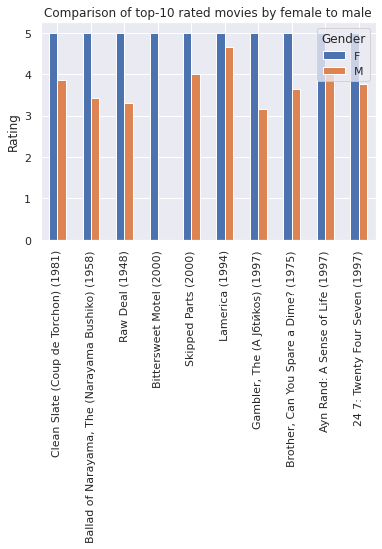

In [25]:
sorted_top_10[:10].plot.bar(title='Comparison of top-10 rated movies by female to male',ylabel ='Rating',xlabel="")